In [2]:
import pandas as pd
from pathlib import Path
import torch 


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/jsflora/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/jsflora/Library/Python/3.12/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/jsflora/Library/Python/3.12/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.sta

In [3]:
alberta_risks_path = Path("Resources/risk_factors/alberta_risks.csv")
alberta_risks = pd.read_csv(alberta_risks_path, encoding='ISO-8859-1', on_bad_lines='skip', skiprows=12)

bc_risks_path = Path("Resources/risk_factors/bc_risks.csv")
bc_risks = pd.read_csv(bc_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

manitoba_risks_path = Path("Resources/risk_factors/manitoba_risks.csv")
manitoba_risks = pd.read_csv(manitoba_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

nb_risks_path = Path("Resources/risk_factors/nb_risks.csv")
nb_risks = pd.read_csv(nb_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

nfl_risks_path = Path("Resources/risk_factors/nfl_risks.csv")
nfl_risks = pd.read_csv(nfl_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

ns_risks_path = Path("Resources/risk_factors/ns_risks.csv")
ns_risks = pd.read_csv(ns_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

ontario_risks_path = Path("Resources/risk_factors/ontario_risks.csv")
ontario_risks = pd.read_csv(ontario_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

pei_risks_path = Path("Resources/risk_factors/pei_risks.csv")
pei_risks = pd.read_csv(pei_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

quebec_risks_path = Path("Resources/risk_factors/quebec_risks.csv")
quebec_risks = pd.read_csv(quebec_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

sask_risks_path = Path("Resources/risk_factors/sask_risks.csv")
sask_risks = pd.read_csv(sask_risks_path, encoding='ISO-8859-1', on_bad_lines='skip',skiprows=12)

In [5]:
incidence_failure_path = Path("Resources/incidence_rates/incidence_failure_final.csv") 
incidence_failure = pd.read_csv(incidence_failure_path)
incidence_ischemic_path = Path("Resources/incidence_rates/incidence_ischemic_final.csv")
incidence_ischemic = pd.read_csv(incidence_ischemic_path)
incidence_myocardial_path = Path("Resources/incidence_rates/incidence_myocardial_final.csv") 
incidence_myocardial = pd.read_csv(incidence_myocardial_path)

In [6]:
import pandas as pd



# Rename the row heading "Rate (per 100,000)"
incidence_failure.rename(columns={"Rate (per 100,000)": "Incidence_heart_failure"}, inplace=True)
incidence_ischemic.rename(columns={"Rate (per 100,000)": "Incidence_ischemic_failure"}, inplace=True)
incidence_myocardial.rename(columns={"Rate (per 100,000)": "Incidence_myocardial_failure"}, inplace=True)

# Save the updated CSV files
incidence_failure.to_csv('incidence_failure_final_updated.csv', index=False)
incidence_ischemic.to_csv('incidence_ischemic_final_updated.csv', index=False)
incidence_myocardial.to_csv('incidence_myocardial_final_updated.csv', index=False)

print("Row headings renamed and files saved successfully!")


Row headings renamed and files saved successfully!


In [18]:
import pandas as pd

# Load the updated CSV files
incidence_failure = pd.read_csv('incidence_failure_final_updated.csv')
incidence_ischemic  = pd.read_csv('incidence_ischemic_final_updated.csv')
incidence_myocardial = pd.read_csv('incidence_myocardial_final_updated.csv')

# Define the required geographies and fiscal year
required_geographies = [
    "Newfoundland and Labrador", "Prince Edward Island", "Nova Scotia",
    "New Brunswick", "Quebec", "Manitoba", "Saskatchewan",
    "British Columbia", "Yukon Territory", "Northwest Territories", "Nunavut"
]
fiscal_year = "2017"

# Filter each dataset for the specified geographies and fiscal year
filtered_failure = incidence_failure[
    (incidence_failure["Geography"].isin(required_geographies)) &
    (incidence_failure["Fiscal year"].str.contains(fiscal_year, na=False))
][["Geography", "Fiscal year", "Incidence_heart_failure"]]

filtered_ischemic = incidence_ischemic[
    (incidence_ischemic["Geography"].isin(required_geographies)) &
    (incidence_ischemic["Fiscal year"].str.contains(fiscal_year, na=False))
][["Geography", "Fiscal year", "Incidence_ischemic_failure"]]

filtered_myocardial = incidence_myocardial[
    (incidence_myocardial["Geography"].isin(required_geographies)) &
    (incidence_myocardial["Fiscal year"].str.contains(fiscal_year, na=False))
][["Geography", "Fiscal year", "Incidence_myocardial_failure"]]
merged_data = pd.merge(filtered_failure, filtered_ischemic, on=["Geography", "Fiscal year"])
merged_data = pd.merge(merged_data, filtered_myocardial, on=["Geography", "Fiscal year"])





# Pivot the data to have Geography as rows and incidence types as columns
pivoted_data_incidence = merged_data.pivot_table(
    index="Geography",  # Set Geography as rows
    values=["Incidence_heart_failure", "Incidence_ischemic_failure", "Incidence_myocardial_failure"],
    aggfunc="first"
)

# Reset the index for better readability
pivoted_data_incidence = pivoted_data_incidence.reset_index()

# Save the pivoted dataset to a CSV file (optional)
pivoted_data_incidence.to_csv("pivoted_incidence_data_geography_rows.csv", index=False)

# Display the pivoted data
print(pivoted_data_incidence)





                    Geography  Incidence_heart_failure  \
0            British Columbia                    629.0   
1                    Manitoba                    589.0   
2               New Brunswick                    541.0   
3   Newfoundland and Labrador                    473.0   
4       Northwest Territories                    342.0   
5                 Nova Scotia                    475.0   
6                     Nunavut                    453.0   
7        Prince Edward Island                    539.0   
8                      Quebec                    553.0   
9                Saskatchewan                    608.0   
10            Yukon Territory                    619.0   

    Incidence_ischemic_failure  Incidence_myocardial_failure  
0                        650.0                         195.0  
1                        477.0                         215.0  
2                        795.0                         319.0  
3                        643.0                     

                    Geography  Incidence_heart_failure  \
0            British Columbia                    629.0   
1                    Manitoba                    589.0   
2               New Brunswick                    541.0   
3   Newfoundland and Labrador                    473.0   
4       Northwest Territories                    342.0   
5                 Nova Scotia                    475.0   
6                     Nunavut                    453.0   
7        Prince Edward Island                    539.0   
8                      Quebec                    553.0   
9                Saskatchewan                    608.0   
10            Yukon Territory                    619.0   

    Incidence_ischemic_failure  Incidence_myocardial_failure  
0                        650.0                         195.0  
1                        477.0                         215.0  
2                        795.0                         319.0  
3                        643.0                     

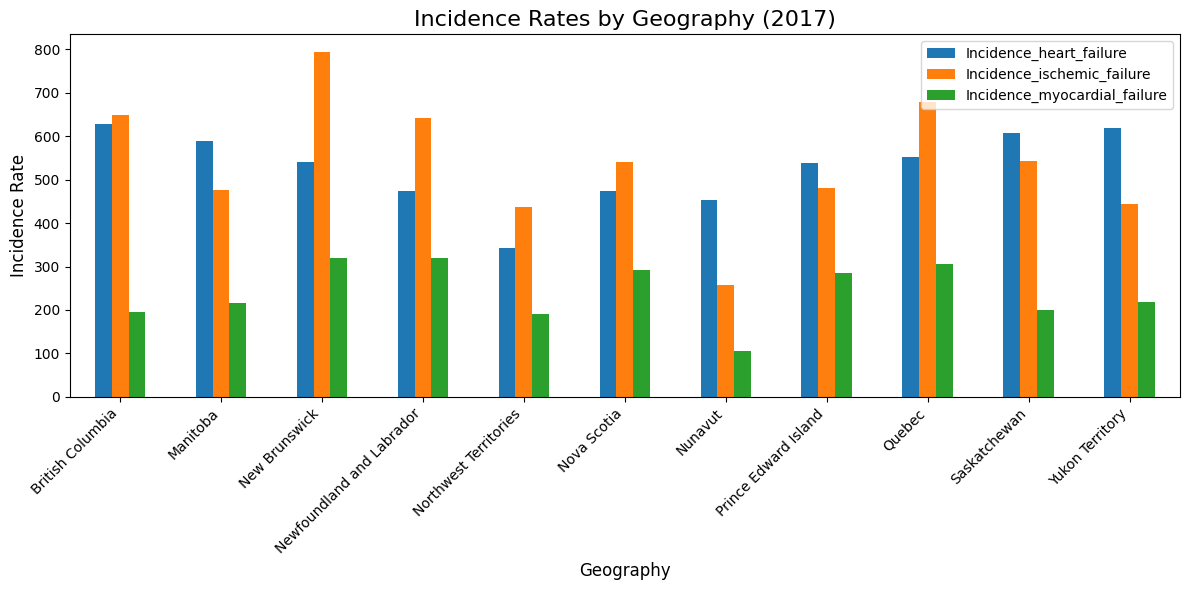

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


pivoted_data = pd.read_csv("pivoted_incidence_data_geography_rows.csv")
print(pivoted_data)
# Plot the bar graph
pivoted_data.plot(
    x="Geography", 
    kind="bar", 
    figsize=(12, 6),
    title="Incidence Rates by Geography (2017)"
)

# Add labels and title
plt.title("Incidence Rates by Geography (2017)", fontsize=16)
plt.xlabel("Geography", fontsize=12)
plt.ylabel("Incidence Rate", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()

# Display the bar graph
plt.show()


In [27]:
import pandas as pd

# Assuming the dataframes are named: alberta_risks, bc_risks, manitoba_risks, nb_risks, nfl_risks, pei_risks,
# quebec_risks, sask_risks, ontario_risks, ns_risks

# Normalize column names to ensure consistency
dataframes = [
    alberta_risks, bc_risks, manitoba_risks, nb_risks, nfl_risks,
    pei_risks, quebec_risks, sask_risks, ontario_risks, ns_risks
]
province_names = [
    'Alberta', 'BC', 'Manitoba', 'NB', 'NFL', 'PEI',
    'Quebec', 'Sask', 'Ontario', 'Nova Scotia'
]

for df in dataframes:
    df.columns = df.columns.str.lower().str.strip()

# Initialize the merged dataframe with the first province
merged_df = dataframes[0][['indicators', '2017']].rename(columns={'2017': province_names[0]})

# Iteratively merge each dataframe on the 'indicators' column
for i in range(1, len(dataframes)):
    temp_df = dataframes[i][['indicators', '2017']].rename(columns={'2017': province_names[i]})
    merged_df = pd.merge(merged_df, temp_df, on='indicators', how='inner')

# Reorder columns to start with 'Indicators'
merged_df = merged_df[['indicators'] + province_names]

# Display the final merged dataframe
print(merged_df)

# Optionally, save the merged dataframe to a CSV file
merged_df.to_csv('merged_province_risks_2017.csv', index=False)


                                           indicators    Alberta         BC  \
0         Perceived health, very good or excellent 15  2,258,400  2,463,900   
1                   Perceived health, fair or poor 15    360,300    544,600   
2   Perceived mental health, very good or excellen...  2,430,700  2,704,900   
3            Perceived mental health, fair or poor 16    245,600    347,000   
4   Perceived life stress, most days quite a bit o...    698,300    879,900   
..                                                ...        ...        ...   
91                                                 57        NaN        NaN   
92                                                 58        NaN        NaN   
93                                                 59        NaN        NaN   
94  How to cite: Statistics Canada. Table 13-10-00...        NaN        NaN   
95  https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...        NaN        NaN   

   Manitoba       NB      NFL     PEI     Quebec   

In [61]:
import pandas as pd

# Assuming the merged dataframe is already created as `merged_df`

# Clean the 'indicators' column by removing trailing numbers using regex
merged_df['indicators'] = merged_df['indicators'].str.replace(r'\s*\d+$', '', regex=True)

# List of specific indicators to select (without numbers)
selected_indicators = [
    "Body mass index, adjusted self-reported, adult (18 years and over), overweight",
    "Current smoker, daily or occasional",
    "Self-reported physical activity, 150 minutes per week, adult (18 years and over)",
]

# Filter the dataframe to include only the selected indicators
filtered_df_value = merged_df[merged_df['indicators'].isin(selected_indicators)]

# Display the filtered dataframe
print(filtered_df_value)

# Optionally, save the filtered dataframe to a CSV file
filtered_df_value.to_csv('filtered_province_risks_new.csv', index=False)


                                           indicators    Alberta         BC  \
5   Body mass index, adjusted self-reported, adult...  1,058,900  1,245,200   
15                Current smoker, daily or occasional    590,400    539,700   
22  Self-reported physical activity, 150 minutes p...  1,979,000  2,433,000   

   Manitoba       NB      NFL     PEI     Quebec     Sask    Ontario  \
5   305,500  190,300  150,600  42,800  2,279,500  294,800  3,834,700   
15  165,400   91,100  107,500  21,400  1,306,700  183,000  1,856,500   
22  525,300  291,800  218,800  63,800  3,599,900  487,700  6,216,000   

   Nova Scotia  
5      245,700  
15     144,400  
22     400,500  


Linear Regression Equation:
Incidence_heart_failure = 0.0000 * Current smoker, daily or occasional + 528.4492

R-squared: 0.0499


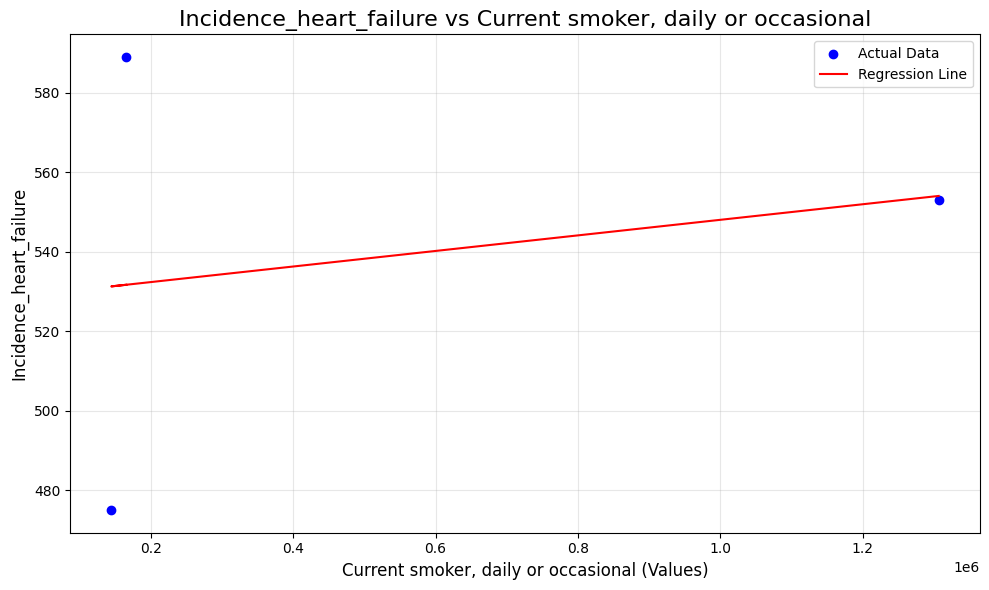

In [77]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Current smoker, daily or occasional"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Current smoker, daily or occasional"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_heart_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_heart_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_heart_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_heart_failure vs {selected_indicator}", fontsize=16)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_heart_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Heart Failure vs current smokers 2017.png", format='png', bbox_inches='tight')
plt.show()
 


In [36]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 7.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd

# Load the dataset
filtered_province_risks_path = 'filtered_province_risks_new.csv'  # Update the file path if necessary
filtered_province_risks = pd.read_csv(filtered_province_risks_path)

# Reshape the dataset to align with Geography
reshaped_filtered_risks = pd.melt(
    filtered_province_risks,
    id_vars=["indicators"],  # Keep the indicators column intact
    var_name="Geography",    # Create a Geography column from column names
    value_name="Risk Value"  # Name for the values in the melted dataframe
)

# Pivot the reshaped dataset to have indicators as columns
pivoted_risks = reshaped_filtered_risks.pivot_table(
    index="Geography",       # Set Geography as rows
    columns="indicators",    # Set indicators as columns
    values="Risk Value",     # Set Risk Value as the data in the table
    aggfunc="first"          # Handle duplicates by taking the first value
).reset_index()              # Reset index for better readability

# Display the pivoted dataset
print("Pivoted Risks Data:")
print(pivoted_risks)

# Save the pivoted dataset to a CSV file (optional)
pivoted_risks.to_csv("pivoted_risks_data.csv", index=False)


Pivoted Risks Data:
indicators    Geography  \
0               Alberta   
1                    BC   
2              Manitoba   
3                    NB   
4                   NFL   
5           Nova Scotia   
6               Ontario   
7                   PEI   
8                Quebec   
9                  Sask   

indicators Body mass index, adjusted self-reported, adult (18 years and over), overweight  \
0                                                   1,058,900                               
1                                                   1,245,200                               
2                                                     305,500                               
3                                                     190,300                               
4                                                     150,600                               
5                                                     245,700                               
6                              

Linear Regression Equation:
Incidence_heart_failure = 0.0000 * Body mass index, adjusted self-reported, adult (18 years and over), overweight + 527.9178

R-squared: 0.0544


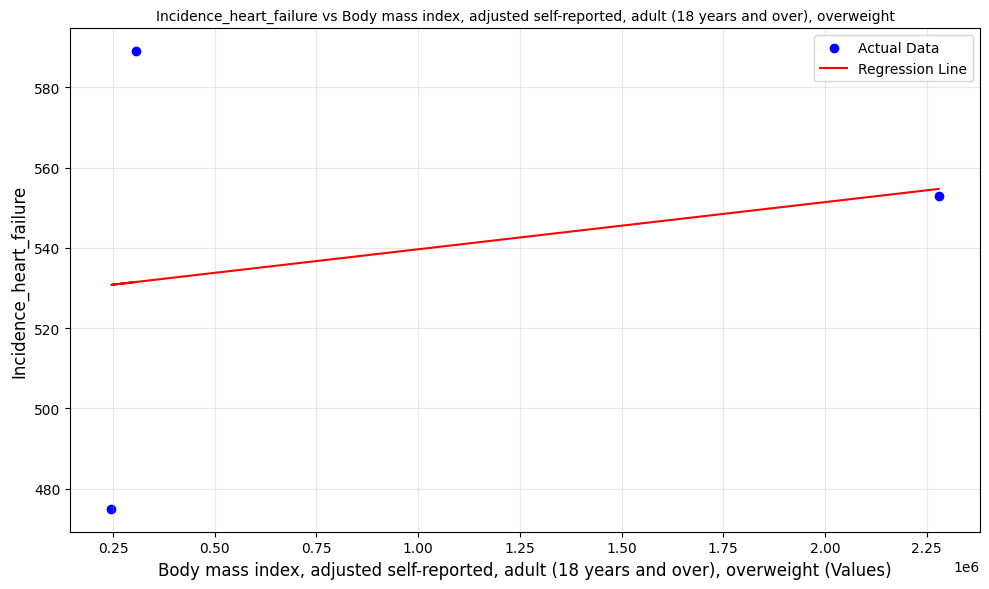

In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Body mass index, adjusted self-reported, adult (18 years and over), overweight"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Body mass index, adjusted self-reported, adult (18 years and over), overweight"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_heart_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_heart_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_heart_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_heart_failure vs {selected_indicator}", fontsize=10)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_heart_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Heart Failure vs BMI 2017.png", format='png', bbox_inches='tight')
plt.show()

Linear Regression Equation:
Incidence_heart_failure = 0.0000 * Self-reported physical activity, 150 minutes per week, adult (18 years and over) + 527.2794

R-squared: 0.0584


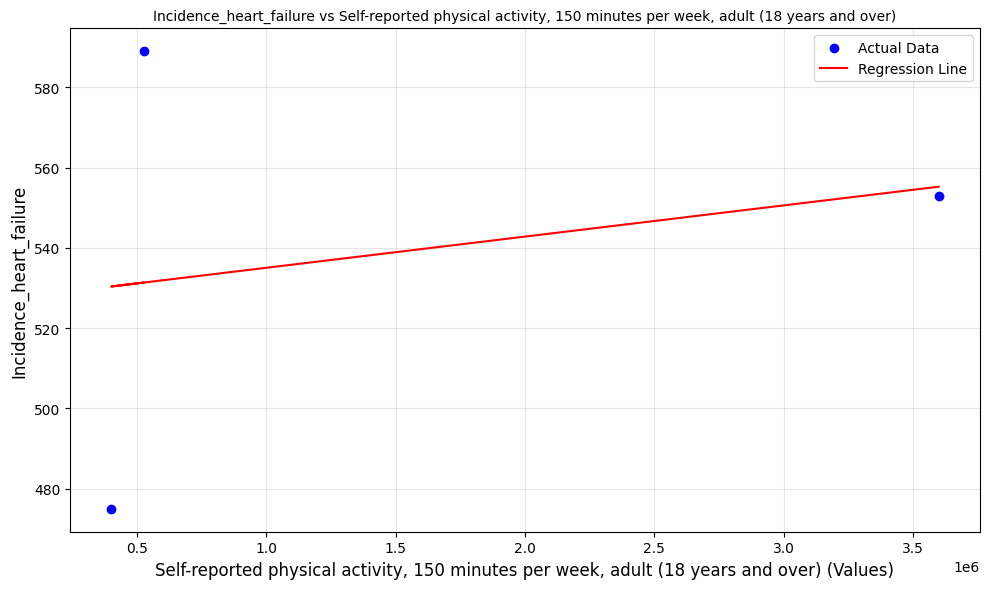

In [79]:
 import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_heart_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_heart_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_heart_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_heart_failure vs {selected_indicator}", fontsize=10)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_heart_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Heart Failure vs Physical Activity 2017.png", format='png', bbox_inches='tight')
plt.show()

Linear Regression Equation:
Incidence_ischemic_failure = 0.0001 * Current smoker, daily or occasional + 486.4323

R-squared: 0.8955


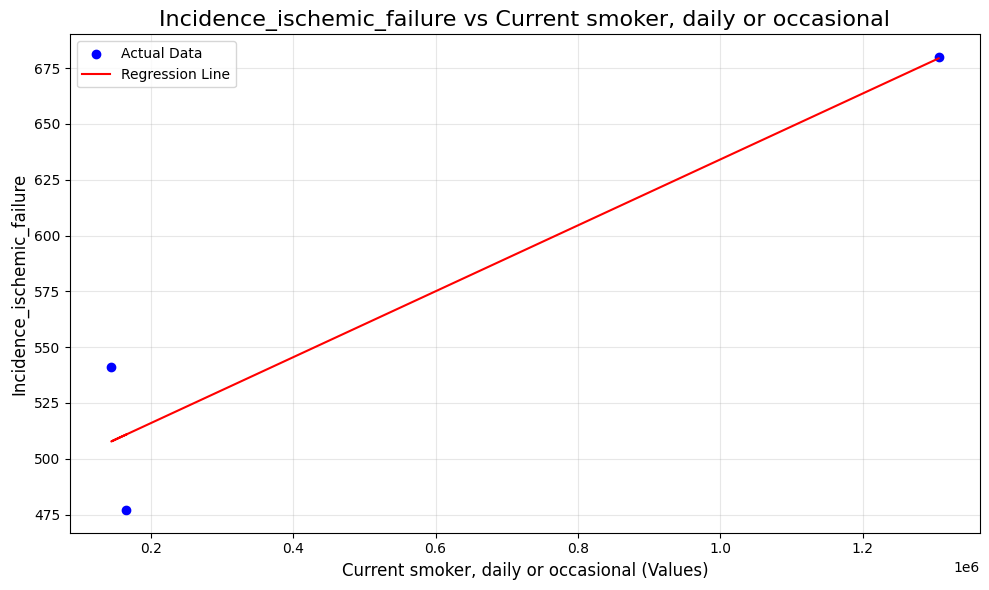

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Current smoker, daily or occasional"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Current smoker, daily or occasional"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_ischemic_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_ischemic_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_ischemic_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_ischemic_failure vs {selected_indicator}", fontsize=16)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_ischemic_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Ischemic Failure vs Current Smoker 2017.png", format='png', bbox_inches='tight')
plt.show()


Linear Regression Equation:
Incidence_ischemic_failure = 0.0001 * Body mass index, adjusted self-reported, adult (18 years and over), overweight + 486.2098

R-squared: 0.8892


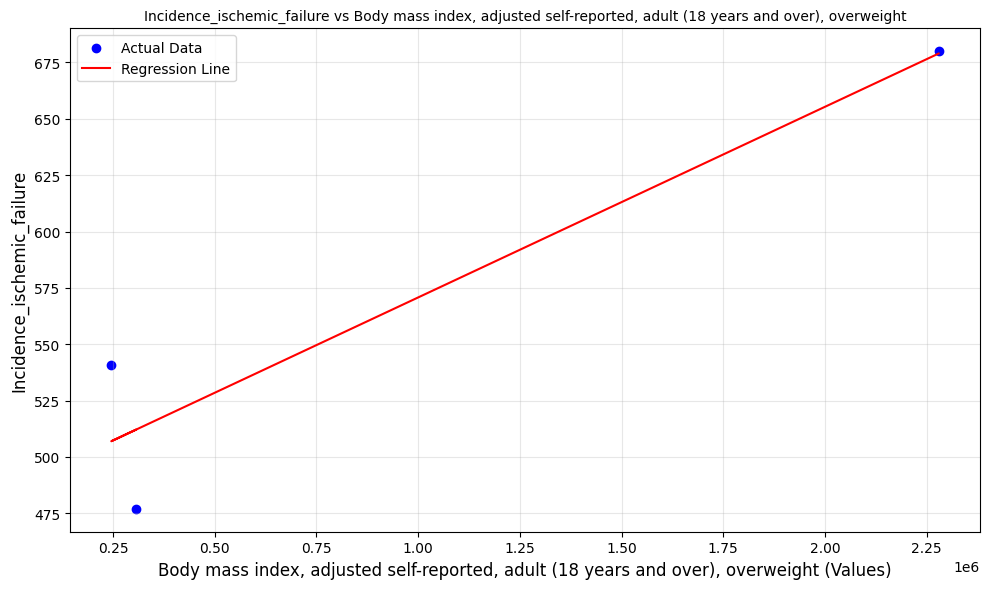

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Body mass index, adjusted self-reported, adult (18 years and over), overweight"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Body mass index, adjusted self-reported, adult (18 years and over), overweight"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_ischemic_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_ischemic_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_ischemic_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_ischemic_failure vs {selected_indicator}", fontsize=10)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_ischemic_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Ischemic Failure vs BMI 2017.png", format='png', bbox_inches='tight')
plt.show()


Linear Regression Equation:
Incidence_ischemic_failure = 0.0001 * Self-reported physical activity, 150 minutes per week, adult (18 years and over) + 484.7817

R-squared: 0.8838


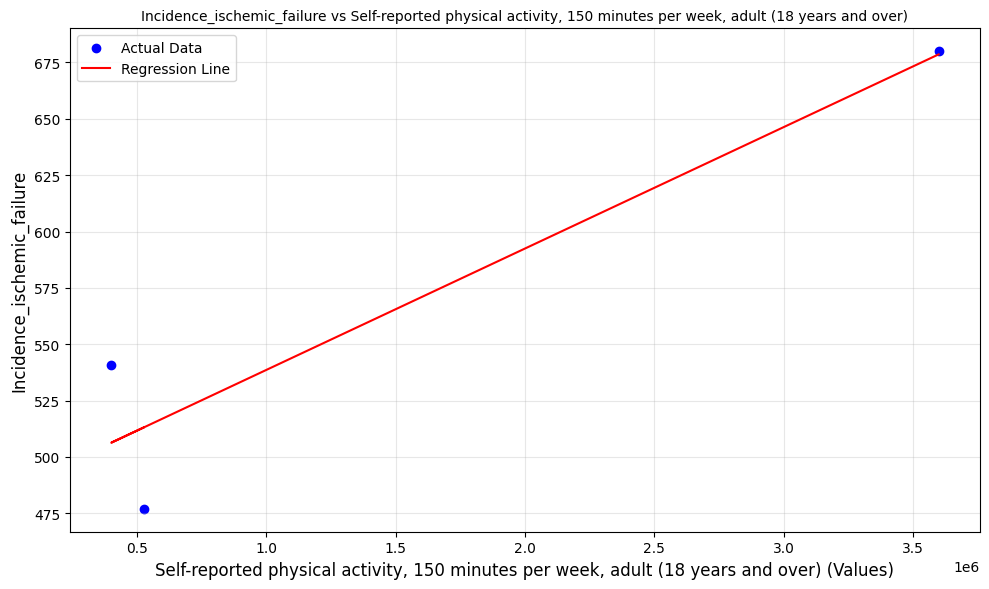

In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_ischemic_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_ischemic_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_ischemic_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_ischemic_failure vs {selected_indicator}", fontsize=10)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_ischemic_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Ischemic Failure vs Physcial Activity 2017.png", format='png', bbox_inches='tight')
plt.show()

Linear Regression Equation:
Incidence_myocardial_failure = 0.0000 * Current smoker, daily or occasional + 247.6461

R-squared: 0.3480


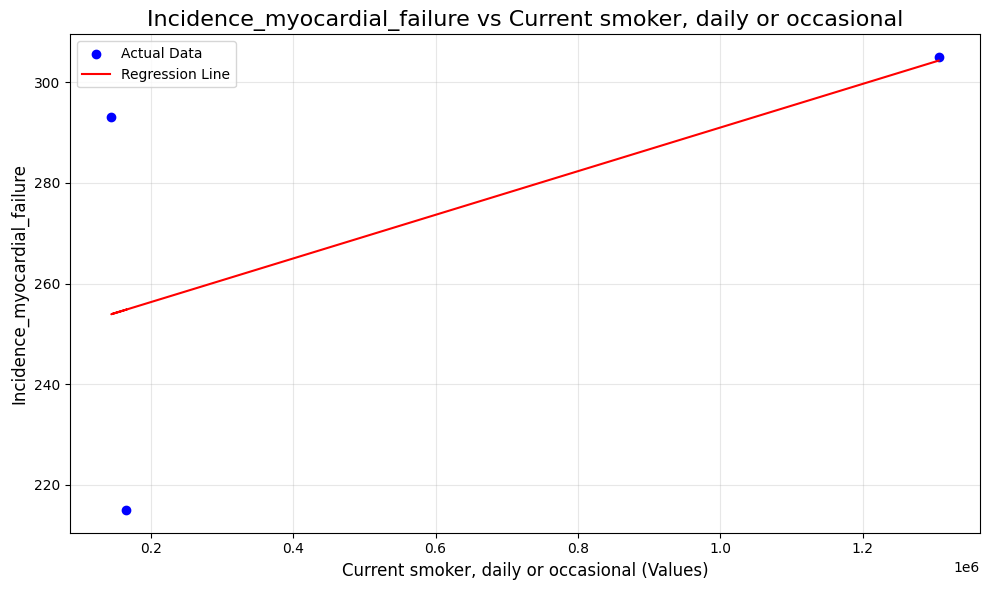

In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Current smoker, daily or occasional"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Current smoker, daily or occasional"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_myocardial_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_myocardial_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_myocardial_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_myocardial_failure vs {selected_indicator}", fontsize=16)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_myocardial_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Myocardial Failure vs Current Smoker 2017.png", format='png', bbox_inches='tight')
plt.show()


Linear Regression Equation:
Incidence_myocardial_failure = 0.0000 * Body mass index, adjusted self-reported, adult (18 years and over), overweight + 247.8234

R-squared: 0.3384


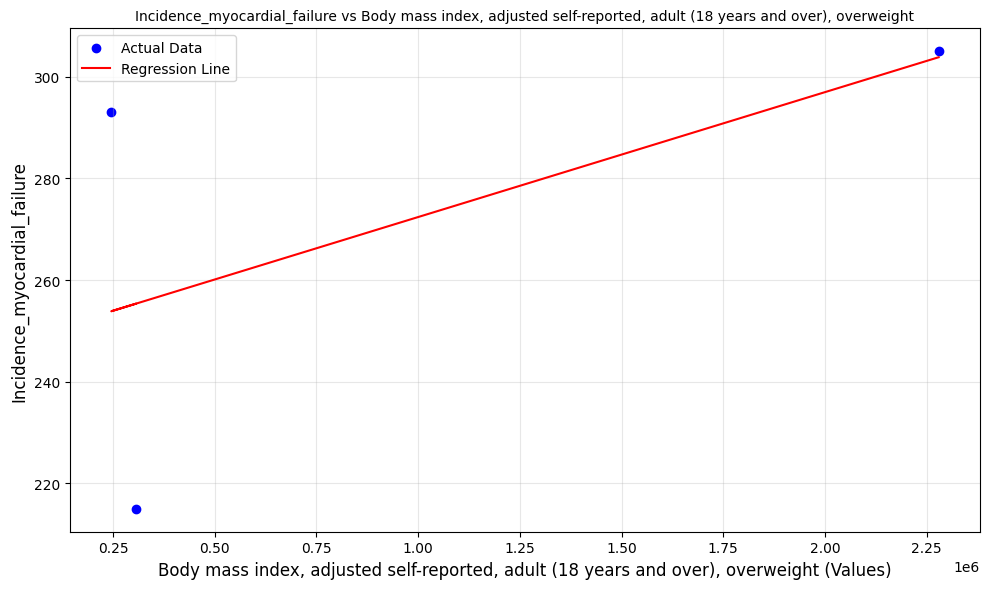

In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Body mass index, adjusted self-reported, adult (18 years and over), overweight"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Body mass index, adjusted self-reported, adult (18 years and over), overweight"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_myocardial_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_myocardial_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_myocardial_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_myocardial_failure vs {selected_indicator}", fontsize=10)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_myocardial_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Myocardial Failure vs BMI 2017.png", format='png', bbox_inches='tight')
plt.show()


Linear Regression Equation:
Incidence_myocardial_failure = 0.0000 * Self-reported physical activity, 150 minutes per week, adult (18 years and over) + 247.6213

R-squared: 0.3303


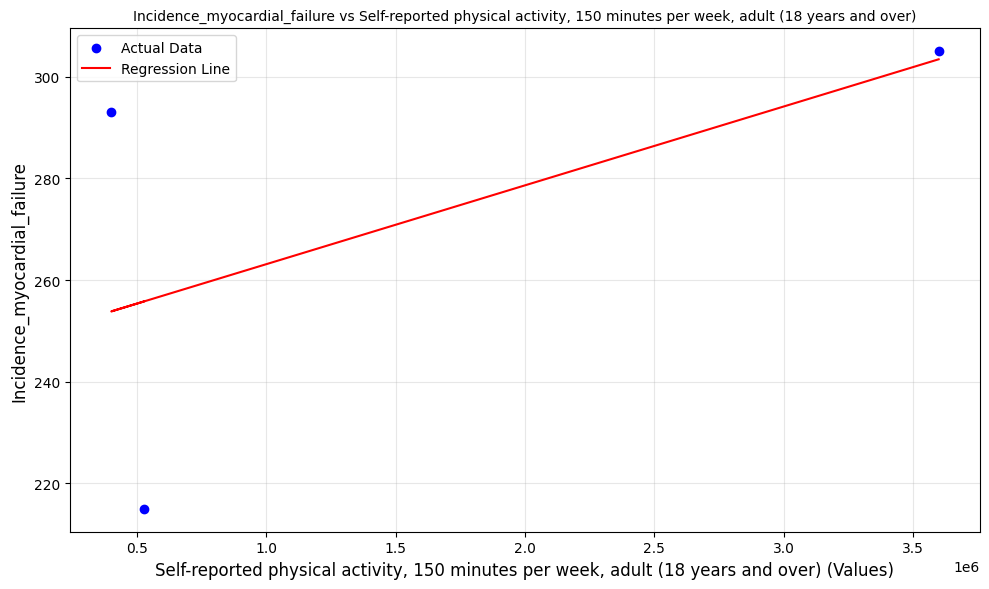

In [85]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the necessary datasets
province_risks_path = 'filtered_province_risks_new.csv'  # Replace with the correct file path
pivoted_incidence_path = 'pivoted_incidence_data_geography_rows.csv'  # Replace with the correct file path

province_risks = pd.read_csv(province_risks_path)
pivoted_incidence = pd.read_csv(pivoted_incidence_path)

# Reshape the province risks dataset to align with Geography
reshaped_risks = pd.melt(
    province_risks,
    id_vars=["indicators"],
    var_name="Geography",
    value_name="Risk Value"
)

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]


# Clean the 'Risk Value' column to ensure numeric data
reshaped_risks["Risk Value"] = reshaped_risks["Risk Value"].replace(",", "", regex=True)
reshaped_risks["Risk Value"] = pd.to_numeric(reshaped_risks["Risk Value"], errors="coerce")

# Drop rows with NaN values in 'Risk Value' to ensure clean data
reshaped_risks = reshaped_risks.dropna(subset=["Risk Value"])

# Filter the reshaped risks data for the selected indicator
selected_indicator = "Self-reported physical activity, 150 minutes per week, adult (18 years and over)"
filtered_risks = reshaped_risks[reshaped_risks['indicators'] == selected_indicator]

# Pivot the filtered risks data to have Geography as rows
pivoted_risks = filtered_risks.pivot_table(
    index="Geography",
    columns="indicators",
    values="Risk Value",
    aggfunc="mean"  # Aggregate values by mean
).reset_index()

# Merge the pivoted risks data with pivoted incidence data
merged_data_indicators = pd.merge(
    pivoted_risks,
    pivoted_incidence[["Geography", "Incidence_myocardial_failure"]],
    on="Geography"
)

# Prepare data for the selected indicator
indicator_values = merged_data_indicators[selected_indicator]
incidence_values = merged_data_indicators["Incidence_myocardial_failure"]

# Perform linear regression for the selected indicator
X = indicator_values.values.reshape(-1, 1)  # Reshape for sklearn
y = incidence_values.values

model = LinearRegression()
model.fit(X, y)

# Get model coefficients and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

# Predict the values
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

# Display regression equation
equation = f"Incidence_myocardial_failure = {coefficient:.4f} * {selected_indicator} + {intercept:.4f}"
print("Linear Regression Equation:")
print(equation)
print(f"\nR-squared: {r_squared:.4f}")

# Plot actual vs predicted for the selected indicator
plt.figure(figsize=(10, 6))
plt.scatter(indicator_values, incidence_values, color="blue", label="Actual Data")
plt.plot(indicator_values, y_pred, color="red", label="Regression Line")

# Add labels, legend, and title
plt.title(f"Incidence_myocardial_failure vs {selected_indicator}", fontsize=10)
plt.xlabel(f"{selected_indicator} (Values)", fontsize=12)
plt.ylabel("Incidence_myocardial_failure", fontsize=12)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.tight_layout()
plt.savefig(" Myocardial Failure vs Physical Activity 2017.png", format='png', bbox_inches='tight')
plt.show()
